## Extra code (Random Attack)

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

def get_graph_stats(graph):
    return {
        "Nodes": graph.number_of_nodes(),
        "Edges": graph.number_of_edges(),
    }

ingredient_graph_path = 'ingredients_weighted_graph.gml'
recipe_graph_2_path = 'recipe_graph_2_common_ingredients.gml'
recipe_graph_5_path = 'recipe_graph_5_common_ingredients.gml'

ingredient_graph = nx.read_gml(ingredient_graph_path)
recipe_graph_2 = nx.read_gml(recipe_graph_2_path)
recipe_graph_5 = nx.read_gml(recipe_graph_5_path)

ingredient_stats = get_graph_stats(ingredient_graph)
recipe_2_stats = get_graph_stats(recipe_graph_2)
recipe_5_stats = get_graph_stats(recipe_graph_5)

results = {
    "Stats": {
        "Ingredient Graph": ingredient_stats,
        "Recipe Graph (2 common)": recipe_2_stats,
        "Recipe Graph (5 common)": recipe_5_stats
    }
}

results


{'Stats': {'Ingredient Graph': {'Nodes': 214, 'Edges': 2672},
  'Recipe Graph (2 common)': {'Nodes': 500, 'Edges': 13253},
  'Recipe Graph (5 common)': {'Nodes': 500, 'Edges': 619}}}

In [9]:
import random
def random_attack(graph, removal_fraction=0.1):
    num_nodes_to_remove = int(removal_fraction * graph.number_of_nodes())
    nodes_to_remove = random.sample(list(graph.nodes()), num_nodes_to_remove)  # Convert nodes to list for sampling
    attacked_graph = graph.copy()
    attacked_graph.remove_nodes_from(nodes_to_remove)
    return attacked_graph

random_attacked_ingredient_graph = random_attack(ingredient_graph, removal_fraction=0.1)
random_attacked_recipe_2_graph = random_attack(recipe_graph_2, removal_fraction=0.1)
random_attacked_recipe_5_graph = random_attack(recipe_graph_5, removal_fraction=0.1)


In [10]:
def targeted_attack(graph, centrality_type="degree", top_n=5):
    """
    Perform a targeted attack by removing the top N nodes based on a centrality measure.
    
    Parameters:
        graph (networkx.Graph): The input graph.
        centrality_type (str): The type of centrality to use ('degree' or 'betweenness').
        top_n (int): The number of top nodes to remove.
        
    Returns:
        networkx.Graph: The graph after the targeted attack.
        list: The nodes that were removed.
    """
    if centrality_type == "degree":
        centrality = nx.degree_centrality(graph)
    elif centrality_type == "betweenness":
        centrality = nx.betweenness_centrality(graph)
    else:
        raise ValueError("Invalid centrality_type. Choose 'degree' or 'betweenness'.")
    
    top_nodes = sorted(centrality.items(), key=lambda x: x[1], reverse=True)[:top_n]
    nodes_to_remove = [node for node, _ in top_nodes]
    
    attacked_graph = graph.copy()
    attacked_graph.remove_nodes_from(nodes_to_remove)
    
    return attacked_graph, nodes_to_remove

targeted_attacked_ingredient_graph_degree, removed_ingredient_nodes_degree = targeted_attack(
    ingredient_graph, centrality_type="degree", top_n=5
)
targeted_attacked_recipe_2_graph_degree, removed_recipe_2_nodes_degree = targeted_attack(
    recipe_graph_2, centrality_type="degree", top_n=5
)
targeted_attacked_recipe_5_graph_degree, removed_recipe_5_nodes_degree = targeted_attack(
    recipe_graph_5, centrality_type="degree", top_n=5
)

targeted_attacked_ingredient_graph_betweenness, removed_ingredient_nodes_betweenness = targeted_attack(
    ingredient_graph, centrality_type="betweenness", top_n=5
)
targeted_attacked_recipe_2_graph_betweenness, removed_recipe_2_nodes_betweenness = targeted_attack(
    recipe_graph_2, centrality_type="betweenness", top_n=5
)
targeted_attacked_recipe_5_graph_betweenness, removed_recipe_5_nodes_betweenness = targeted_attack(
    recipe_graph_5, centrality_type="betweenness", top_n=5
)


In [11]:
ingredient_random_stats = get_graph_stats(random_attacked_ingredient_graph)
recipe_2_random_stats = get_graph_stats(random_attacked_recipe_2_graph)
recipe_5_random_stats = get_graph_stats(random_attacked_recipe_5_graph)

ingredient_targeted_degree_stats = get_graph_stats(targeted_attacked_ingredient_graph_degree)
recipe_2_targeted_degree_stats = get_graph_stats(targeted_attacked_recipe_2_graph_degree)
recipe_5_targeted_degree_stats = get_graph_stats(targeted_attacked_recipe_5_graph_degree)

ingredient_targeted_betweenness_stats = get_graph_stats(targeted_attacked_ingredient_graph_betweenness)
recipe_2_targeted_betweenness_stats = get_graph_stats(targeted_attacked_recipe_2_graph_betweenness)
recipe_5_targeted_betweenness_stats = get_graph_stats(targeted_attacked_recipe_5_graph_betweenness)

results = {
    "Random Attack": {
        "Ingredient Graph": ingredient_random_stats,
        "Recipe Graph (2 common)": recipe_2_random_stats,
        "Recipe Graph (5 common)": recipe_5_random_stats
    },
    "Targeted Attack (Degree Centrality)": {
        "Ingredient Graph": ingredient_targeted_degree_stats,
        "Recipe Graph (2 common)": recipe_2_targeted_degree_stats,
        "Recipe Graph (5 common)": recipe_5_targeted_degree_stats
    },
    "Targeted Attack (Betweenness Centrality)": {
        "Ingredient Graph": ingredient_targeted_betweenness_stats,
        "Recipe Graph (2 common)": recipe_2_targeted_betweenness_stats,
        "Recipe Graph (5 common)": recipe_5_targeted_betweenness_stats
    }
}

results


{'Random Attack': {'Ingredient Graph': {'Nodes': 193, 'Edges': 2140},
  'Recipe Graph (2 common)': {'Nodes': 450, 'Edges': 10788},
  'Recipe Graph (5 common)': {'Nodes': 450, 'Edges': 457}},
 'Targeted Attack (Degree Centrality)': {'Ingredient Graph': {'Nodes': 209,
   'Edges': 2070},
  'Recipe Graph (2 common)': {'Nodes': 495, 'Edges': 12228},
  'Recipe Graph (5 common)': {'Nodes': 495, 'Edges': 420}},
 'Targeted Attack (Betweenness Centrality)': {'Ingredient Graph': {'Nodes': 209,
   'Edges': 2082},
  'Recipe Graph (2 common)': {'Nodes': 495, 'Edges': 12245},
  'Recipe Graph (5 common)': {'Nodes': 495, 'Edges': 486}}}

Top Ingredients by Degree Centrality (Random Attack: Ingredient Graph):
   Ingredient  Degree Centrality
6        salt           0.697917
12      onion           0.609375
23     pepper           0.557292
34     garlic           0.494792
26      sugar           0.473958
27        oil           0.468750
4      butter           0.447917
16      water           0.437500
13   tomatoes           0.348958
49      flour           0.343750


/var/folders/dp/bpwqgym94gvcdsp87531xs500000gn/T/ipykernel_71374/1481577969.py:33: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


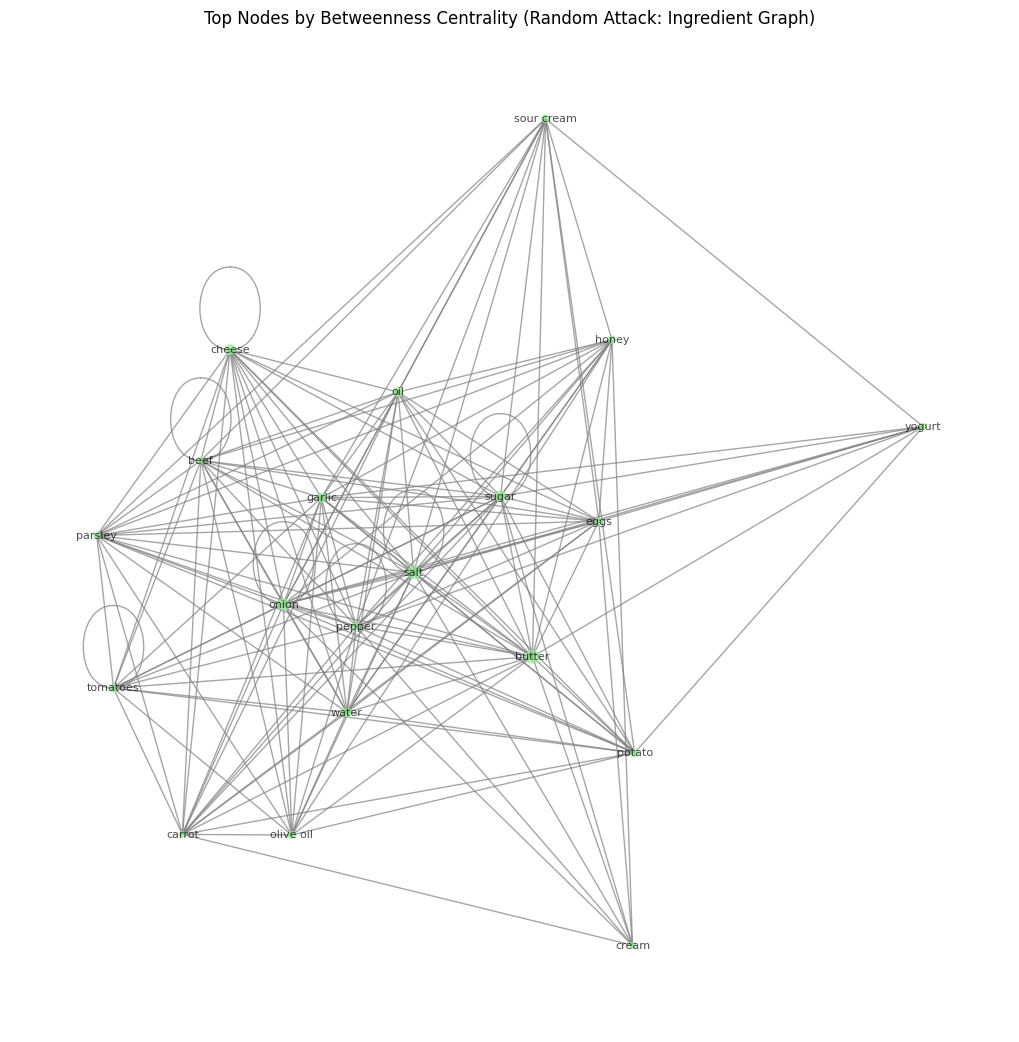

Top Ingredients by Degree Centrality (Random Attack: Recipe Graph (2 Common Ingredients)):
    Ingredient  Degree Centrality
60       38276           0.458797
342     243409           0.414254
44       26995           0.407572
401     444320           0.403118
349     193430           0.391982
407      92113           0.383073
66       83950           0.378619
112      50662           0.367483
36       93959           0.358575
415     356849           0.340757


/var/folders/dp/bpwqgym94gvcdsp87531xs500000gn/T/ipykernel_71374/1481577969.py:33: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


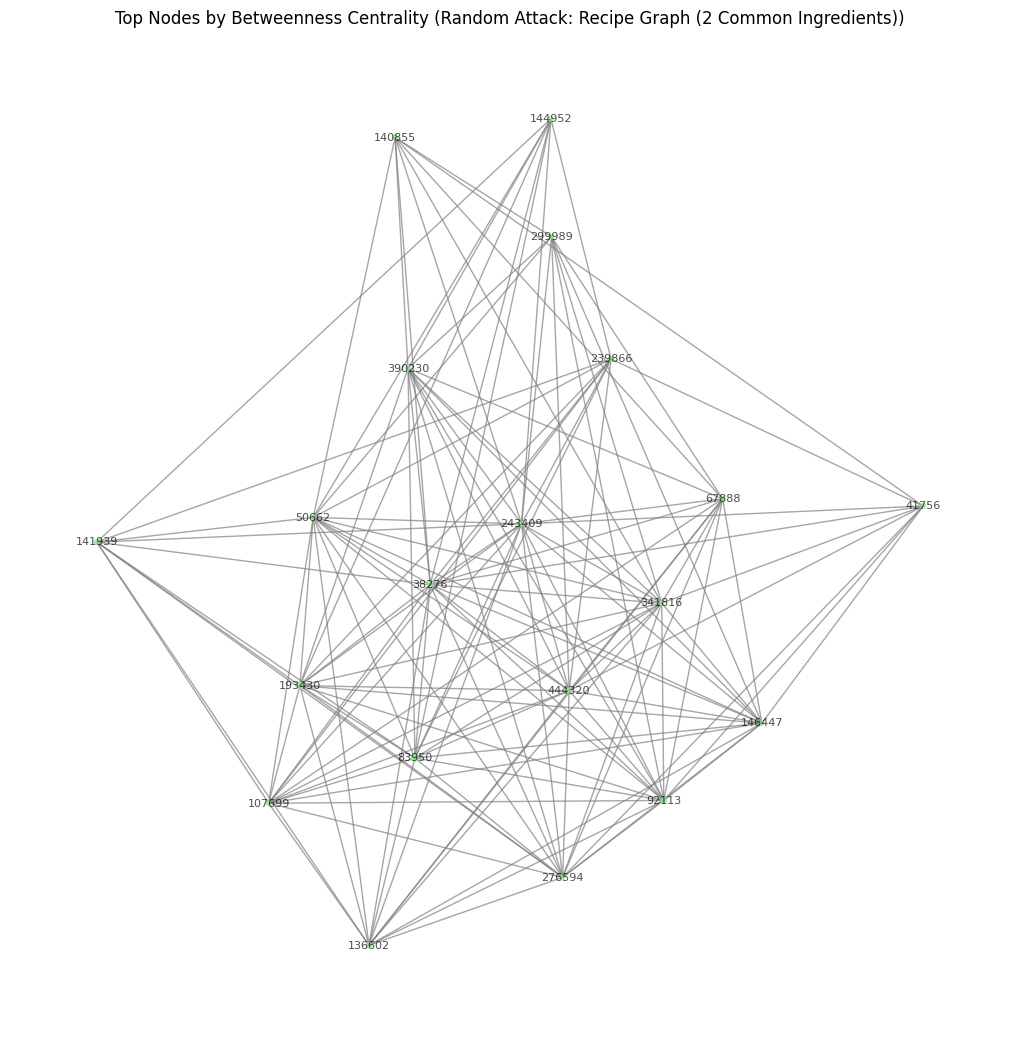

Top Ingredients by Degree Centrality (Random Attack: Recipe Graph (5 Common Ingredients)):
    Ingredient  Degree Centrality
39       93959           0.082405
391     437637           0.073497
86       39363           0.069042
340     371961           0.064588
258     325714           0.062361
116     118843           0.060134
355      39172           0.055679
417     393988           0.055679
130     149593           0.055679
115     177187           0.051225


/var/folders/dp/bpwqgym94gvcdsp87531xs500000gn/T/ipykernel_71374/1481577969.py:33: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


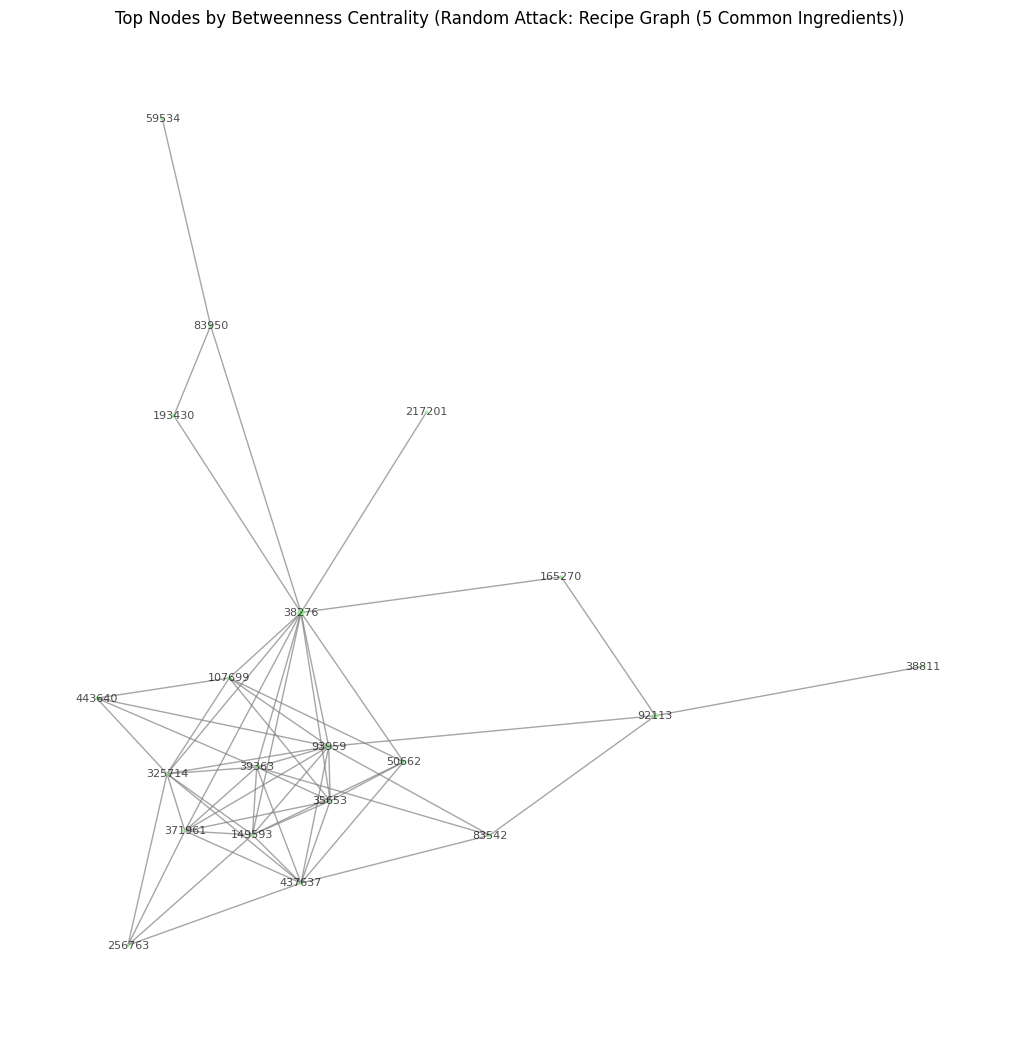

Top Ingredients by Degree Centrality (Targeted Attack (Degree): Ingredient Graph):
    Ingredient  Degree Centrality
27         oil           0.461538
15       water           0.447115
4       butter           0.437500
12    tomatoes           0.350962
10      cheese           0.322115
51       flour           0.322115
105     carrot           0.322115
8         eggs           0.317308
5    olive oil           0.307692
11        beef           0.302885


/var/folders/dp/bpwqgym94gvcdsp87531xs500000gn/T/ipykernel_71374/1481577969.py:33: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


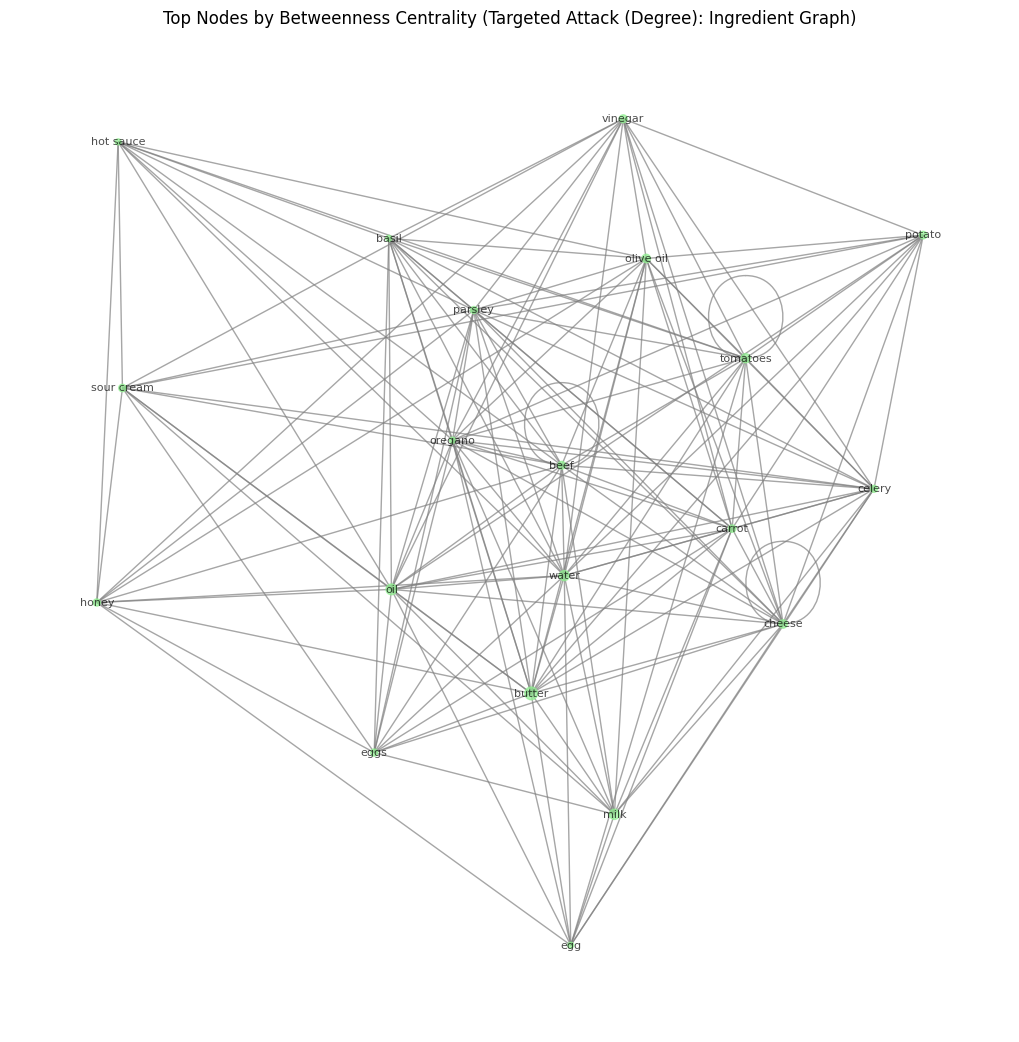

Top Ingredients by Degree Centrality (Targeted Attack (Degree): Recipe Graph (2 Common Ingredients)):
    Ingredient  Degree Centrality
450      92113           0.382591
77       83950           0.378543
125      50662           0.356275
41       93959           0.352227
102      59534           0.336032
414     341816           0.336032
386     463219           0.329960
458     356849           0.327935
374     371961           0.325911
431     437637           0.323887


/var/folders/dp/bpwqgym94gvcdsp87531xs500000gn/T/ipykernel_71374/1481577969.py:33: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


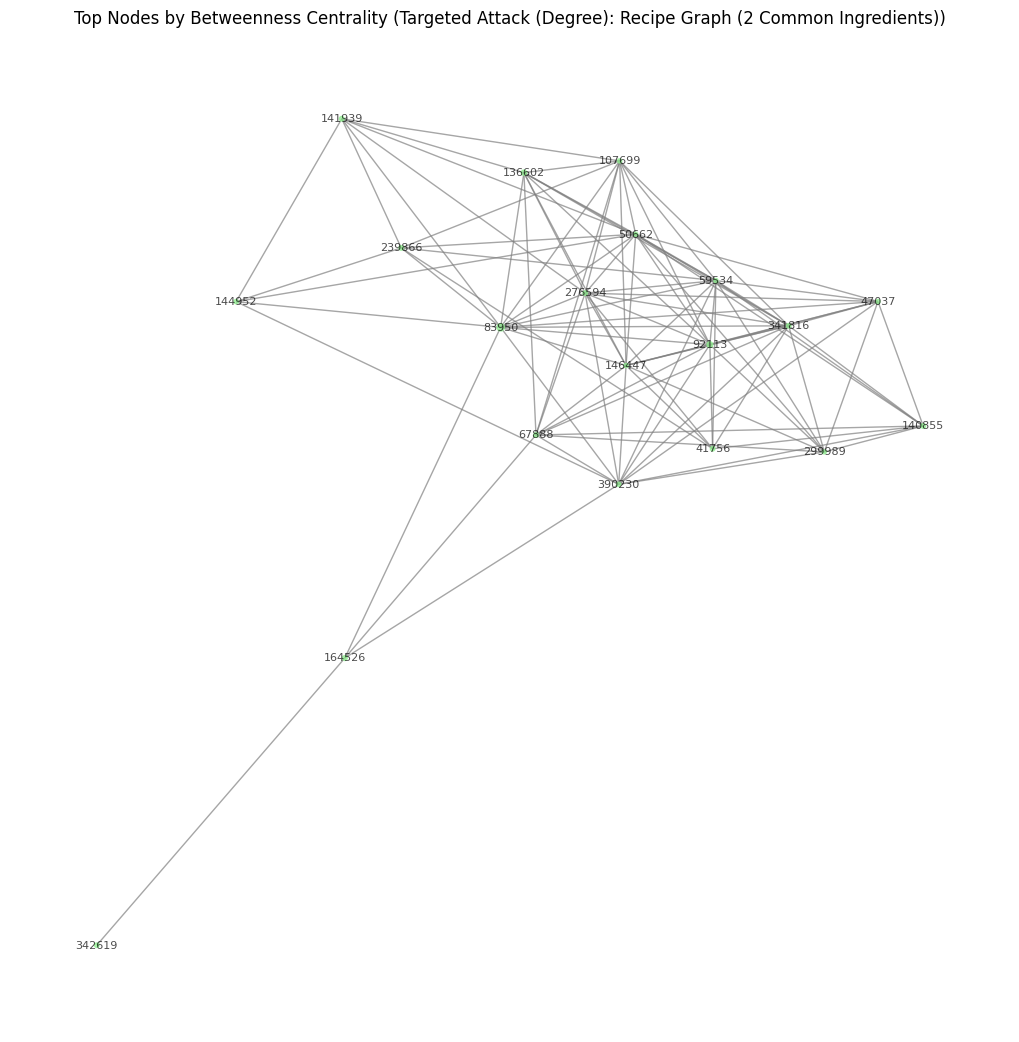

Top Ingredients by Degree Centrality (Targeted Attack (Degree): Recipe Graph (5 Common Ingredients)):
    Ingredient  Degree Centrality
373     371961           0.058704
286     325714           0.056680
126     118843           0.054656
391      39172           0.048583
141     149593           0.048583
459     393988           0.046559
125     177187           0.044534
151     236184           0.044534
46       83025           0.044534
210     269909           0.042510


/var/folders/dp/bpwqgym94gvcdsp87531xs500000gn/T/ipykernel_71374/1481577969.py:33: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


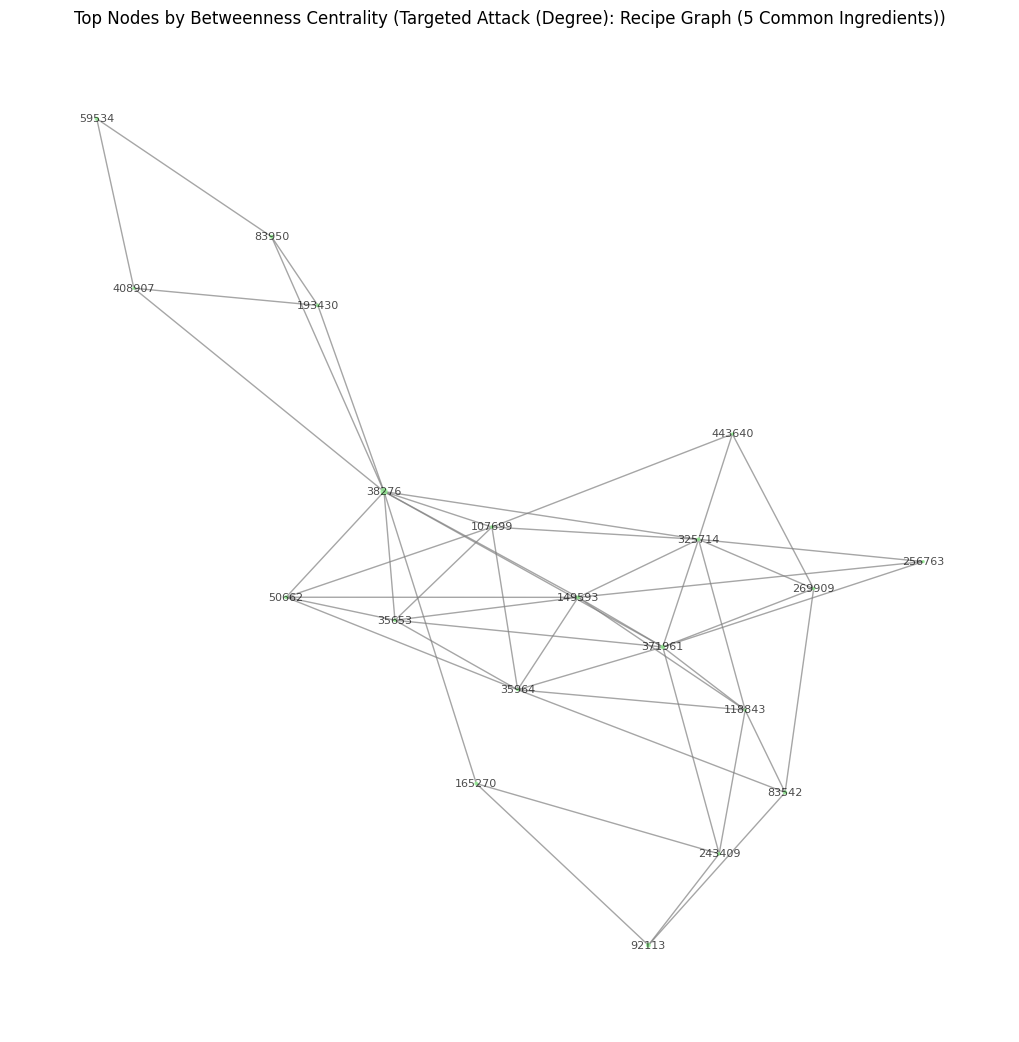

Top Ingredients by Degree Centrality (Targeted Attack (Betweenness): Ingredient Graph):
    Ingredient  Degree Centrality
34      garlic           0.495192
26         oil           0.461538
14       water           0.447115
11    tomatoes           0.350962
9       cheese           0.322115
51       flour           0.322115
105     carrot           0.322115
7         eggs           0.317308
4    olive oil           0.307692
10        beef           0.302885


/var/folders/dp/bpwqgym94gvcdsp87531xs500000gn/T/ipykernel_71374/1481577969.py:33: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


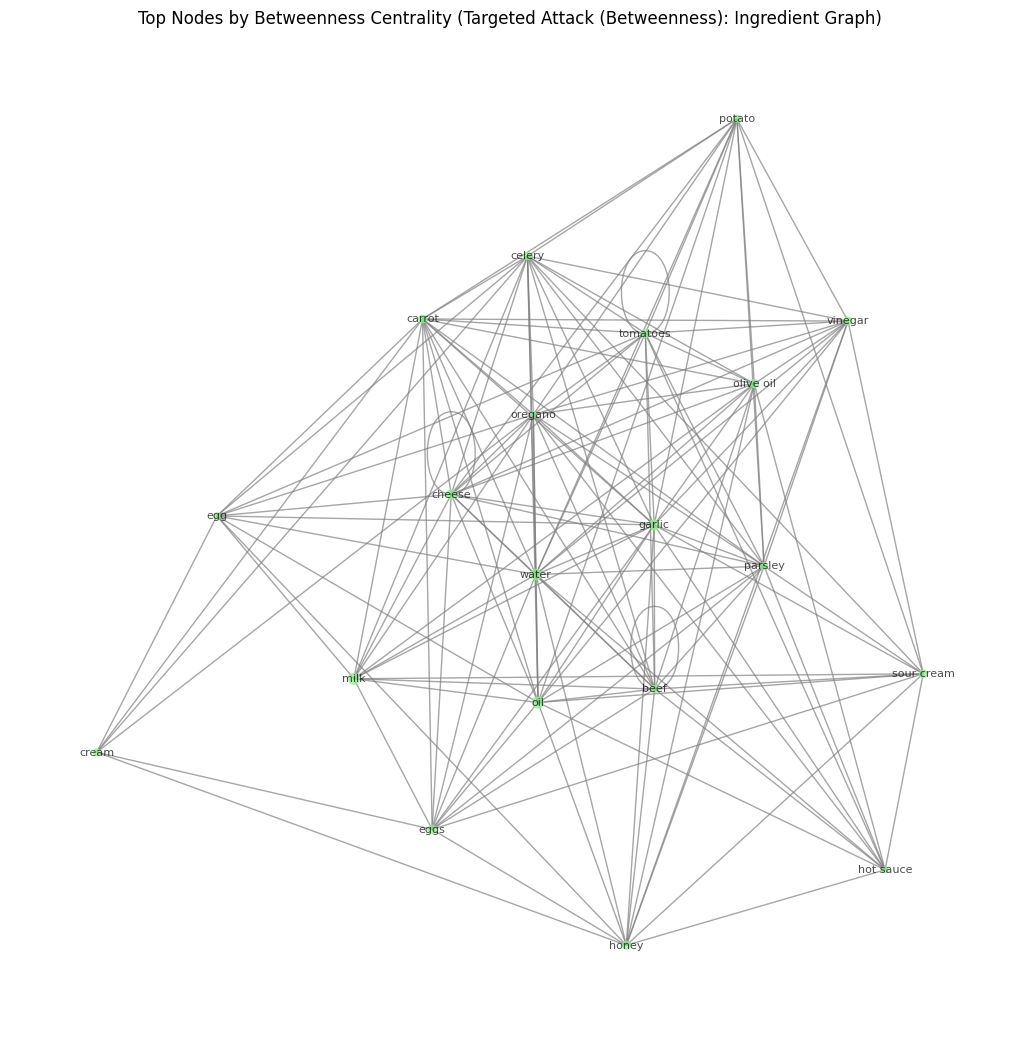

Top Ingredients by Degree Centrality (Targeted Attack (Betweenness): Recipe Graph (2 Common Ingredients)):
    Ingredient  Degree Centrality
50       26995           0.400810
444     444320           0.394737
125      50662           0.356275
41       93959           0.352227
414     341816           0.336032
102      59534           0.336032
386     463219           0.329960
458     356849           0.327935
374     371961           0.325911
431     437637           0.323887


/var/folders/dp/bpwqgym94gvcdsp87531xs500000gn/T/ipykernel_71374/1481577969.py:33: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


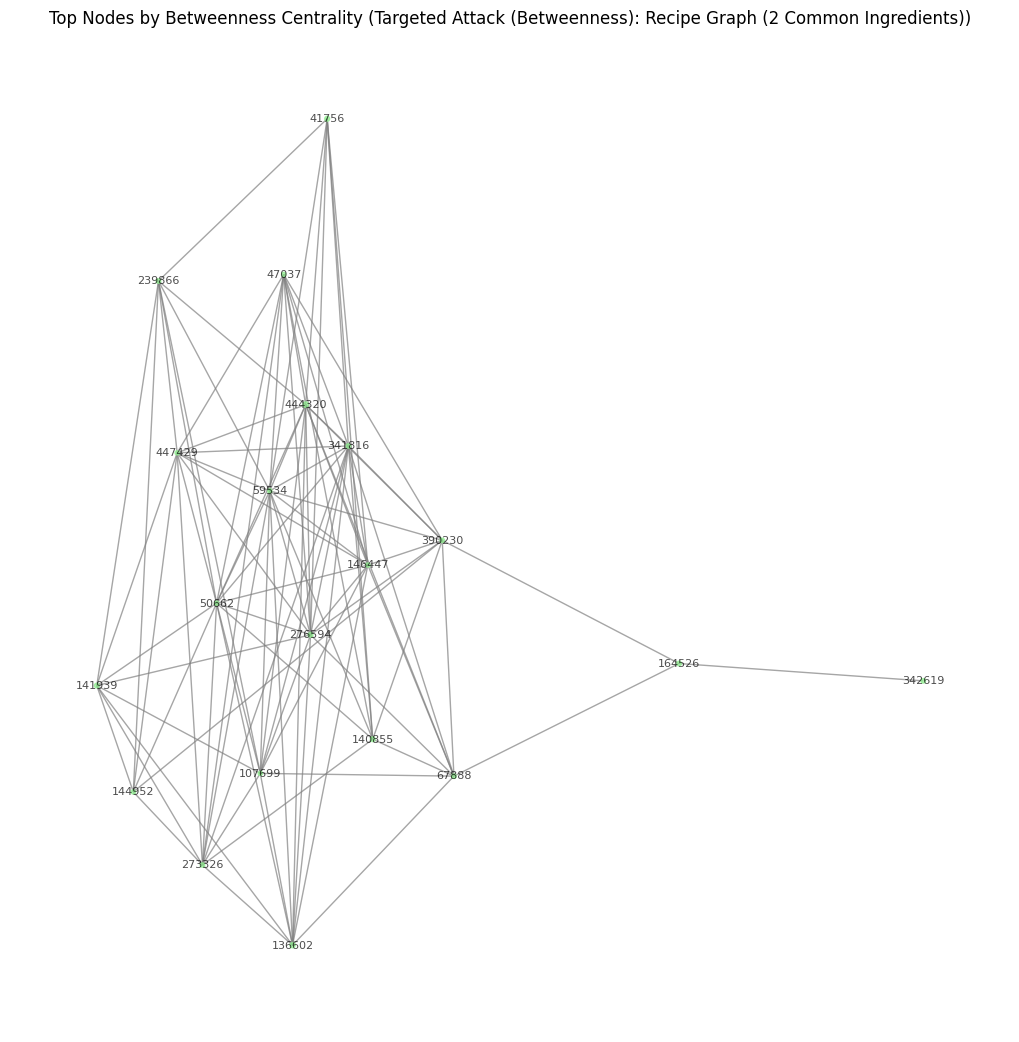

Top Ingredients by Degree Centrality (Targeted Attack (Betweenness): Recipe Graph (5 Common Ingredients)):
    Ingredient  Degree Centrality
431     437637           0.070850
458     356849           0.068826
92       39363           0.066802
372     371961           0.062753
285     325714           0.060729
125     118843           0.060729
390      39172           0.054656
459     393988           0.052632
140     149593           0.050607
124     177187           0.050607


/var/folders/dp/bpwqgym94gvcdsp87531xs500000gn/T/ipykernel_71374/1481577969.py:33: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


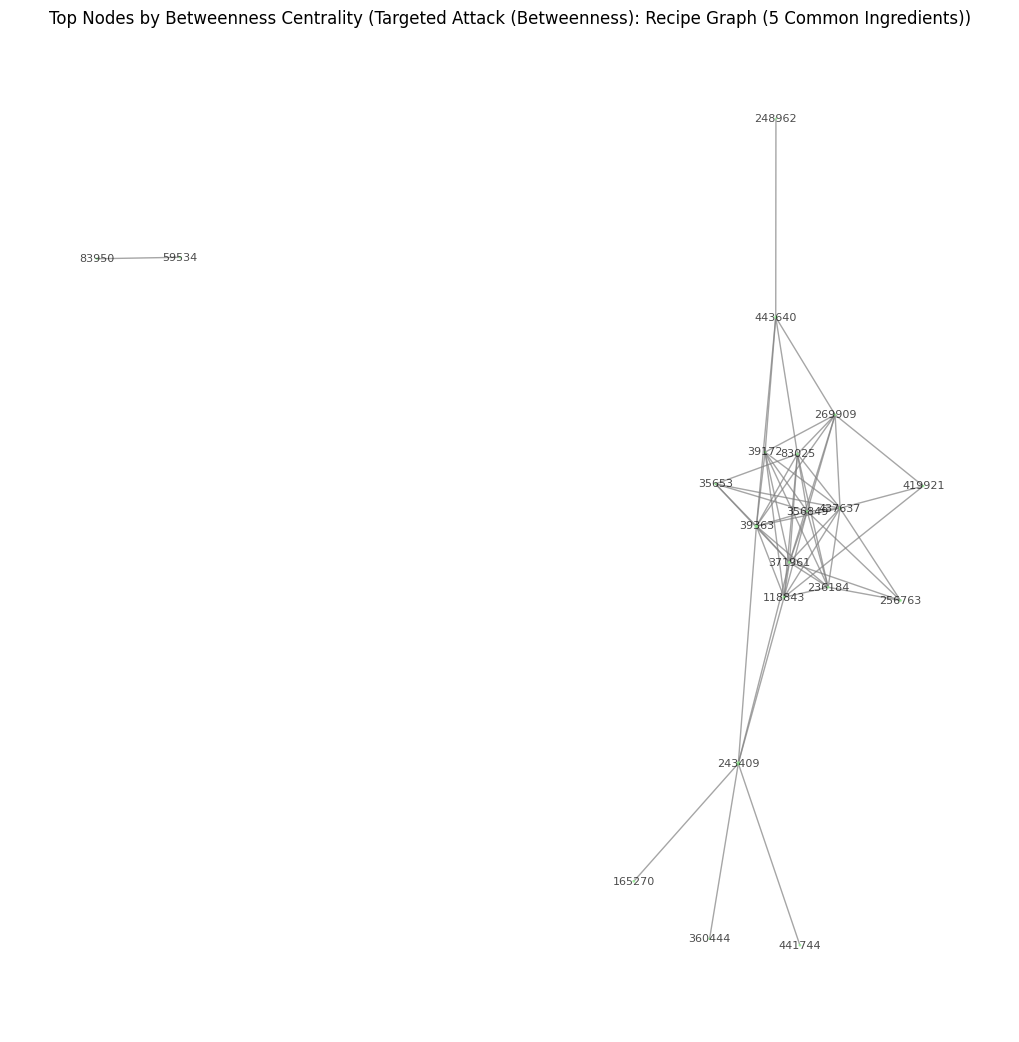

In [13]:
def analyze_and_plot_centralities(graph, graph_title, top_n=10, betweenness_top_n=20):
    degree_centrality = nx.degree_centrality(graph)
    betweenness_centrality = nx.betweenness_centrality(graph, weight='weight')
    closeness_centrality = nx.closeness_centrality(graph)
    eigenvector_centrality = nx.eigenvector_centrality(graph, weight='weight', max_iter=1000)

    centrality_df = pd.DataFrame({
        'Ingredient': list(degree_centrality.keys()),
        'Degree Centrality': list(degree_centrality.values()),
        'Betweenness Centrality': list(betweenness_centrality.values()),
    })

    top_centrality = centrality_df.sort_values(by='Degree Centrality', ascending=False).head(top_n)
    print(f"Top Ingredients by Degree Centrality ({graph_title}):")
    print(top_centrality[['Ingredient', 'Degree Centrality']])

    top_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:betweenness_top_n]
    top_nodes = [node for node, _ in top_betweenness]
    top_graph = graph.subgraph(top_nodes)

    plt.figure(figsize=(10, 10))
    pos = nx.spring_layout(top_graph, k=0.5, iterations=50)
    node_size = [betweenness_centrality[node] * 1000 for node in top_graph.nodes()]
    nx.draw(
        top_graph, pos, with_labels=True, node_color='lightgreen', node_size=node_size,
        font_size=8, edge_color='gray', alpha=0.7
    )
    plt.title(f"Top Nodes by Betweenness Centrality ({graph_title})")
    plt.tight_layout()
    plt.show()


analyze_and_plot_centralities(random_attacked_ingredient_graph, "Random Attack: Ingredient Graph")
analyze_and_plot_centralities(random_attacked_recipe_2_graph, "Random Attack: Recipe Graph (2 Common Ingredients)")
analyze_and_plot_centralities(random_attacked_recipe_5_graph, "Random Attack: Recipe Graph (5 Common Ingredients)")

analyze_and_plot_centralities(targeted_attacked_ingredient_graph_degree, "Targeted Attack (Degree): Ingredient Graph")
analyze_and_plot_centralities(targeted_attacked_recipe_2_graph_degree, "Targeted Attack (Degree): Recipe Graph (2 Common Ingredients)")
analyze_and_plot_centralities(targeted_attacked_recipe_5_graph_degree, "Targeted Attack (Degree): Recipe Graph (5 Common Ingredients)")

analyze_and_plot_centralities(targeted_attacked_ingredient_graph_betweenness, "Targeted Attack (Betweenness): Ingredient Graph")
analyze_and_plot_centralities(targeted_attacked_recipe_2_graph_betweenness, "Targeted Attack (Betweenness): Recipe Graph (2 Common Ingredients)")
analyze_and_plot_centralities(targeted_attacked_recipe_5_graph_betweenness, "Targeted Attack (Betweenness): Recipe Graph (5 Common Ingredients)")